In [1]:
import matplotlib.pyplot as plt
from dzdy import *

In [2]:

par_script = """ 
PCore pSIR{
    transmission_rate = 1.5
    rec_rate ~ triangle(0.1, 0.2, 0.3)
    beta ~ exp(transmission_rate)
    gamma ~ exp(rec_rate)
    Die ~ exp(0.2)
}
"""

dc_ctbn_script = '''
CTBN SIR_BN {
    life[Alive | Dead]
    sir[S | I | R]
    
    Alive{life:Alive}
    Dead{life:Dead}
    Inf{life:Alive, sir:I}
    Rec{life:Alive, sir:R}
    Sus{life:Alive, sir:S}

    Die -> Dead # from transition Die to state Dead by distribution Die
    Sus -- Infect(beta) -> Inf 
    Inf -- Recov(gamma) -> Rec
    
    Alive -- Die # from state Alive to transition Die
}
'''

da = Director()
da.read_pc(par_script)
da.read_dc(dc_ctbn_script)

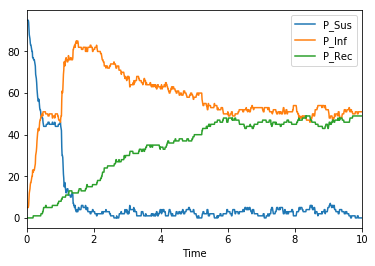

In [6]:
cfd = da.new_mc('ABM_M2', 'ABM', tar_pc='pSIR', tar_dc='SIR_BN')
cfd.add_behaviour('cycle', be_type='Reincarnation', s_birth = 'Sus', s_death = 'Dead')
cfd.add_behaviour('step', be_type='TimeStep', ts=[0.5, 1], ys=[1, 0.1, 5], t_tar = 'Infect')

cfd.set_observations(states=['Sus', 'Inf', 'Rec'])

mod, out = da.simulate('ABM_M2', y0={'Sus': 95, 'Inf': 5}, fr=0 ,to=10, dt=.01)
out.plot()
plt.show()

In [3]:
cfd = da.new_mc('ABM_M2', 'ABM', tar_pc='pSIR', tar_dc='SIR_BN')
cfd.add_network('IDU', 'BA', m=2)
cfd.add_behaviour('cycle', be_type='Reincarnation', s_birth = 'Sus', s_death = 'Dead')
cfd.add_behaviour('transmission', be_type='NetShock', s_src = 'Inf', t_tar = 'Infect', net='IDU')

cfd.set_observations(states=['Sus', 'Inf', 'Rec'])

cfd = da.new_mc('ABM_M5', 'ABM', tar_pc='pSIR', tar_dc='SIR_BN')
cfd.add_network('IDU', 'BA', m=5)
cfd.add_behaviour('cycle', be_type='Reincarnation', s_birth = 'Sus', s_death = 'Dead')
cfd.add_behaviour('transmission', be_type='NetShock', s_src = 'Inf', t_tar = 'Infect', net='*')

cfd.set_observations(states=['Sus', 'Inf', 'Rec'])

In [4]:
lyo = da.new_layout('Lyo1')
lyo.add_entry('A', 'ABM_M2', {'Sus': 20, 'Inf': 10})
lyo.add_entry('B', 'ABM_M2', {'Sus': 20}, size=3)
lyo.add_entry('C', 'ABM_M5', {'Sus': 20, 'Inf': 10}, size=2)

In [5]:
mod, out = da.simulate('Lyo1', fr=0, to=10)
out.plot()
plt.show()

TypeError: generate_model() argument after ** must be a mapping, not NoneType

In [6]:
pc, dc = generate_pc_dc(da.get_pc('pSIR'), da.get_dc('SIR_BN'))
mc = CoreODE(dc)
mc.Mods['FOI'] = InfectionFD('FOI', 'Infect', 'Inf')
mc.Mods['Dead'] = Reincarnation('Dead', s_death='Dead', s_birth='Sus')
model = ODEModel('SIR', mc, dt=0.01)
model.add_obs_transition('Infect')
model.add_obs_state('Alive')
model.add_obs_state('Inf')
model.add_obs_state('Sus')   
model.add_obs_behaviour('Dead')

In [7]:
cfd = da.new_mc('EBM', 'CoreODE', tar_pc='pSIR', tar_dc='SIR_BN')
cfd.add_behaviour('FOI', be_type='InfectionFD', s_src = 'Inf', t_tar = 'Infect')
cfd.add_behaviour('Dead', be_type='Reincarnation', s_death='Dead', s_birth='Sus')

cfd.set_observations(states=['Sus', 'Inf', 'Rec', 'Alive'], behaviours=['FOI'])


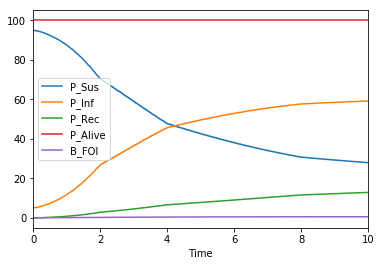

In [11]:
mod, out = da.simulate('EBM', y0={'Sus': 95, 'Inf': 5}, fr=0 ,to=10, dt=.01)
#da.copy_model(mod_src=mod)
out.plot()
plt.show()

In [ ]:
out = simulate(model, y0={'Sus': 95, 'Inf': 5}, fr=0 ,to=10, dt=0.1)
out.plot()
plt.show()

In [ ]:
list(np.linspace(1,5,2))

In [ ]:
def sir(y, t, pars):
    s, a, c, tr, r = y
    n = sum(y)
    i = a+c+t
    be = pars['beta']
    ds = - be*s*i/n
    da = be*(s+r)*i/n - pars['Chronic']*a - pars['Recover|A']*a
    dc = pars['Chronic']*a - pars['Treat']*c
    dtr = pars['Treat']*c - pars['Recover|T']*tr
    dr = -be*r*i/n + pars['Recover|A']*a+pars['Recover|T']*tr
    return [ds, da, dc, dtr, dr]
    
pars = {
    'beta': 0.005,
    'Chronic': 0.7,
    'Treat': 0.1,
    'Recover|A': 0.99,
    'Fail|T': 1/12,
    'Recover|T': 0.8,
    'Death': 0.006,
    'Death|C': 0.06,
    'Death|F': 0.06
}
ebm = ODEModel('SIR', sir, ['S', 'A', 'C', 'T', 'R'], pars, 0.1)

In [ ]:
obs = simulate(ebm, y0={'S': 100, 'A': 5, 'C': 20}, fr = 0, to=10)

In [ ]:
import matplotlib.pyplot as plt
obs.plot()
plt.show()

In [ ]:
from epidag import DirectedAcyclicGraph

dag = DirectedAcyclicGraph("""
PCore D {
    X ~ gamma(0.01, 0.01)
    B ~ beta(2, 2)
}
""")

In [13]:
x = None
x is None

True